In [1]:
# Import basic packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("Classified Data",index_col=0)

In [3]:
dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


# Data Preprocessing

#### Missing value

In [4]:
dataset.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

#### Label encoding

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


#### Feature scaling

In [6]:
x=dataset.drop('TARGET CLASS',axis=1)

In [7]:
y=dataset['TARGET CLASS']

In [8]:
x

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [9]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)
x

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
x=pd.DataFrame(x)

In [12]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Imbalance data

In [13]:
y.value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

It's complete balanced data

# Split the data into training & test for building KNN model & prediction

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 10)
(250, 10)
(750,)
(250,)


# Building KNN Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### Classification Report

In [18]:
print(classification_report(y_train,y_pred_knn_train))
print("*"*80)
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       376
           1       0.93      0.97      0.95       374

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

********************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       124
           1       0.95      0.96      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



#### Confusion matrix

In [19]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("*"*30)
print(confusion_matrix(y_test,y_pred_knn_test))

[[350  26]
 [ 12 362]]
******************************
[[117   7]
 [  5 121]]


#### Accuracy score

In [20]:
print(accuracy_score(y_train,y_pred_knn_train))
print("*"*20)
print(accuracy_score(y_test,y_pred_knn_test))

0.9493333333333334
********************
0.952


### Select the best K value by using error rate 

In [21]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

In [22]:
error_rate

[0.08,
 0.088,
 0.064,
 0.056,
 0.048,
 0.048,
 0.044,
 0.032,
 0.044,
 0.036,
 0.04,
 0.044,
 0.044,
 0.044,
 0.04,
 0.044,
 0.036,
 0.044,
 0.044,
 0.052,
 0.052,
 0.048,
 0.044,
 0.044,
 0.048,
 0.044,
 0.052,
 0.048,
 0.048,
 0.04,
 0.048,
 0.048,
 0.048,
 0.048,
 0.052,
 0.048,
 0.048,
 0.048,
 0.048]

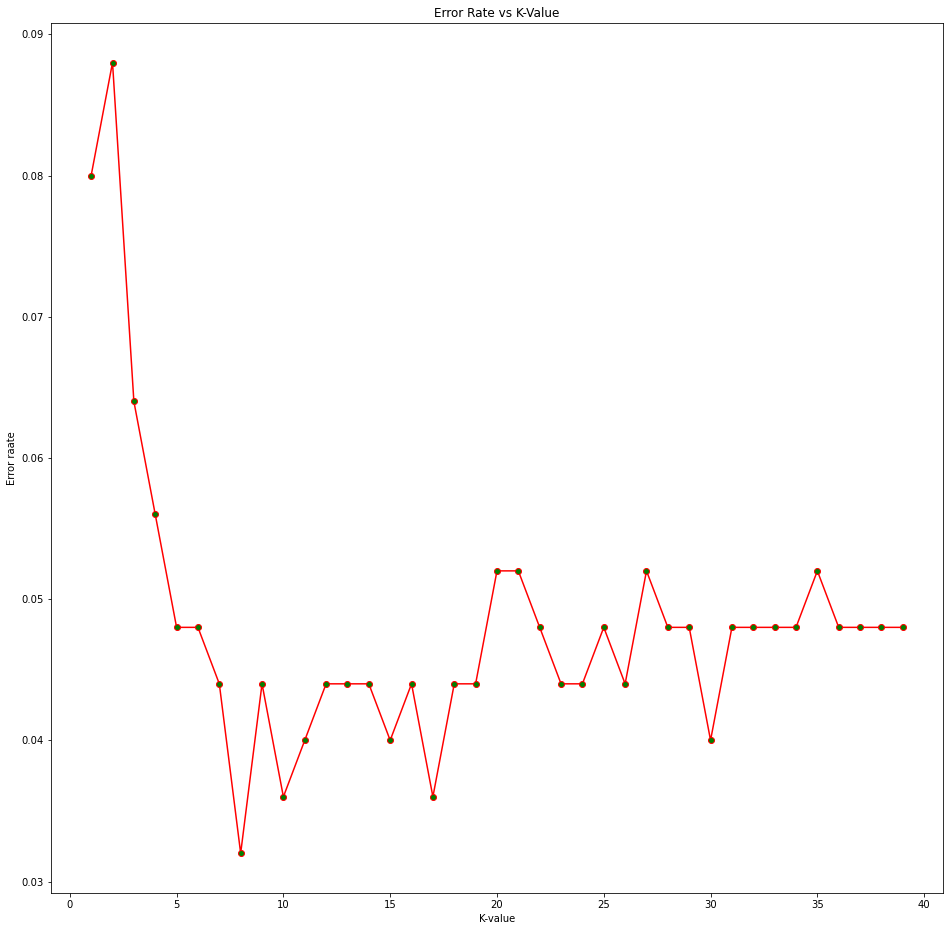

In [23]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40),error_rate,color='red',marker='o',markerfacecolor='green')
plt.title('Error Rate vs K-Value')
plt.xlabel('K-value')
plt.ylabel('Error raate')
plt.show()


Here we can observe around K-value 7 the error rate is minimum

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_pred_knn_train1=knn.predict(x_train)
y_pred_knn_test1=knn.predict(x_test)

In [26]:
print(accuracy_score(y_train,y_pred_knn_train1))
print("*"*20)
print(accuracy_score(y_test,y_pred_knn_test1))

0.9346666666666666
********************
0.952
